In [164]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *

from sklearn.preprocessing import StandardScaler #Z-score variables

from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [165]:
bankruptcy = pd.read_csv('/Users/willstrauss/Documents/Data_Science/Data/Bankrupt.csv')

In [166]:
bankruptcy.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.0068

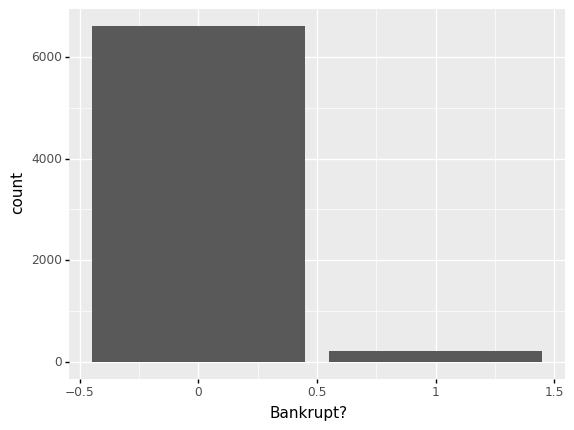

<ggplot: (8794723673661)>

In [167]:
ggplot(bankruptcy, aes(x ='Bankrupt?')) + geom_bar()

In [168]:
y = bankruptcy['Bankrupt?']
bankruptcy.drop(['Bankrupt?'], axis = 1, inplace = True)

z = StandardScaler()

z.fit_transform(bankruptcy)

array([[-2.21790935, -2.04579778, -2.400361  , ..., -0.09897786,
         0.        , -0.62206729],
       [-0.67382819, -0.31106786, -0.59844969, ...,  0.3645587 ,
         0.        , -0.53557337],
       [-1.30367191, -0.90841978, -1.3199096 , ..., -0.125015  ,
         0.        , -0.62195984],
       ...,
       [-0.53484482, -0.37919423, -0.53499599, ..., -0.01510132,
         0.        ,  1.0012064 ],
       [ 0.01787518,  0.01959426,  0.00740279, ..., -0.00427044,
         0.        , -0.07136384],
       [-0.19983866,  0.17495561, -0.06561243, ..., -0.01445435,
         0.        ,  3.72572884]])

In [169]:
pca = PCA()
pca.fit(bankruptcy)

pcaDF = pd.DataFrame({'expl_var': pca.explained_variance_ratio_, 
                      'component': range(1,96), 
                      'cum_variance': pca.explained_variance_ratio_.cumsum()})

pd.set_option("display.max_rows", None, "display.max_columns", None)

pcaDF

,expl_var,component,cum_variance
0,2.234262e-01,1,0.223426
1,1.553621e-01,2,0.378788
2,1.256732e-01,3,0.504462
3,1.215942e-01,4,0.626056
4,1.099555e-01,5,0.736011
5,9.027313e-02,6,0.826284
6,8.407327e-02,7,0.910358
7,6.922255e-02,8,0.979580
8,4.702420e-03,9,0.984283
9,4.522331e-03,10,0.988805


In [170]:
bankruptcy = pca.transform(bankruptcy)
bankruptcy = pd.DataFrame(bankruptcy[:, 1:8])

In [171]:
X = bankruptcy

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [172]:
y_pred = tree.predict(X_test)
accuracy_score(y_test, y_pred)

0.9464809384164223

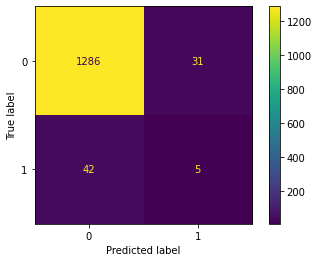

In [173]:
plot_confusion_matrix(tree, X_test, y_test)

In [174]:
tree.get_depth()

25

In [175]:
tree.get_n_leaves()

262

In [176]:
tree = DecisionTreeClassifier(max_depth = 5)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [177]:
y_pred = tree.predict(X_test)
accuracy_score(y_test, y_pred)

0.9655425219941349

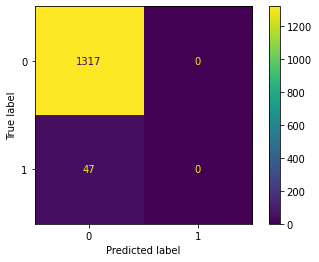

In [178]:
plot_confusion_matrix(tree, X_test, y_test)